# Preparing notebook and folders

In [1]:
import os

import numpy as np
np.random.seed(18)
import matplotlib.pyplot as plt

from F2_func_file import *

In [2]:
#Create folder for storing generated data files
if not os.path.exists("Data_files"):
    os.mkdir("Data_files")
if not os.path.exists("Data_files/Generated_data"):
    os.mkdir("Data_files/Generated_data")

# Generating the data

In [3]:
#The fixed parameters
number_of_samples = 100
image_size = 50
Poisson_noise = 10

#These parameters are replaced by horizontal axis values in appropriate places
emitter_power = 5000
PSF_width = 2
concentration = 50

## Generate dataset for the SNR graph - panel (A)

In [4]:
#Horizontal axis
SNR_axis_array = np.logspace(0, 5, 51)                      #Horizontal axis expressed as Signal-to-noise ratio (= Emitter power / Average noise intensity)
EP_axis_array = SNR_axis_array * Poisson_noise              #Horizontal axis expressed as Emitter power

In [5]:
#Generating the SNR dataset
SNR_data_low_res = np.zeros((SNR_axis_array.shape[0], number_of_samples, image_size, image_size))
SNR_data_high_res = np.zeros((SNR_axis_array.shape[0], number_of_samples, image_size, image_size))

for i in range(SNR_axis_array.shape[0]):
    SNR_data_low_res[i], SNR_data_high_res[i] = Generate_normed_dataset(number_of_samples, image_size, EP_axis_array[i], Poisson_noise, PSF_width, concentration)

In [6]:
#Save the dataset
np.save("Data_files/Generated_data/SNR_data_low_res.npy", SNR_data_low_res)
np.save("Data_files/Generated_data/SNR_data_high_res.npy", SNR_data_high_res)
np.save("Data_files/Generated_data/SNR_axis_array.npy", SNR_axis_array)

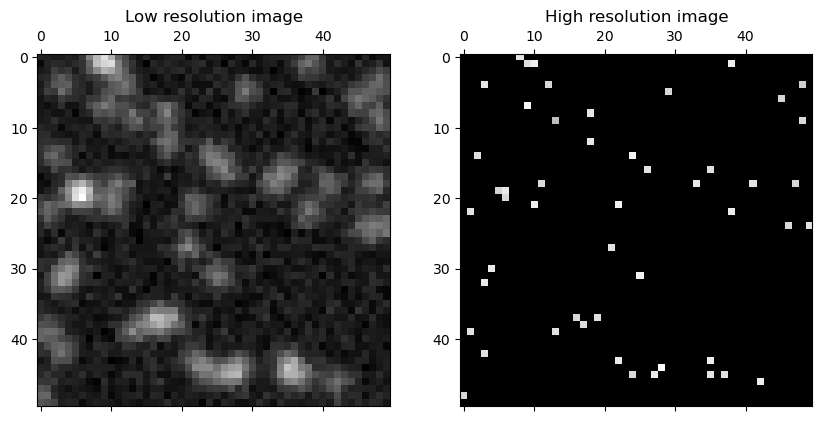

In [7]:
#Show an example of a generated data pair
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(SNR_data_low_res[15,0], cmap="gray", fignum=False)
plt.title("Low resolution image")

plt.subplot(122)
plt.matshow(SNR_data_high_res[15,0], cmap="gray", fignum=False)
plt.title("High resolution image")

plt.show()

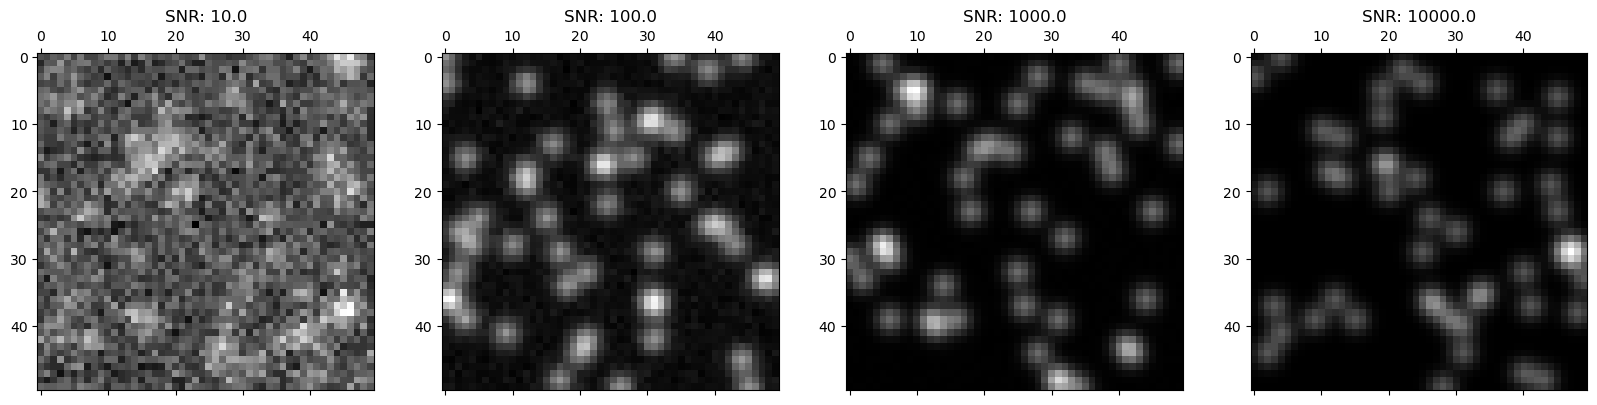

In [8]:
#Show examples for various SNR values
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.matshow(SNR_data_low_res[10,0], cmap="gray", fignum=False)
plt.title("SNR: " + str(SNR_axis_array[10]))
plt.subplot(142)
plt.matshow(SNR_data_low_res[20,0], cmap="gray", fignum=False)
plt.title("SNR: " + str(SNR_axis_array[20]))
plt.subplot(143)
plt.matshow(SNR_data_low_res[30,0], cmap="gray", fignum=False)
plt.title("SNR: " + str(SNR_axis_array[30]))
plt.subplot(144)
plt.matshow(SNR_data_low_res[40,0], cmap="gray", fignum=False)
plt.title("SNR: " + str(SNR_axis_array[40]))

plt.show()

## Generate dataset for the PSF width graph - panel (B)

In [9]:
#Horizontal axis
PSF_width_axis_array = np.logspace(0, 1, 51)

In [10]:
#Generating the PSF width dataset
PSF_data_low_res = np.zeros((PSF_width_axis_array.shape[0], number_of_samples, image_size, image_size))
PSF_data_high_res = np.zeros((PSF_width_axis_array.shape[0], number_of_samples, image_size, image_size))

for i in range(PSF_width_axis_array.shape[0]):
    PSF_data_low_res[i], PSF_data_high_res[i] = Generate_normed_dataset(number_of_samples, image_size, emitter_power, Poisson_noise, PSF_width_axis_array[i], concentration)

In [11]:
#Save the dataset
np.save("Data_files/Generated_data/PSF_data_low_res.npy", PSF_data_low_res)
np.save("Data_files/Generated_data/PSF_data_high_res.npy", PSF_data_high_res)
np.save("Data_files/Generated_data/PSF_axis_array.npy", PSF_width_axis_array)

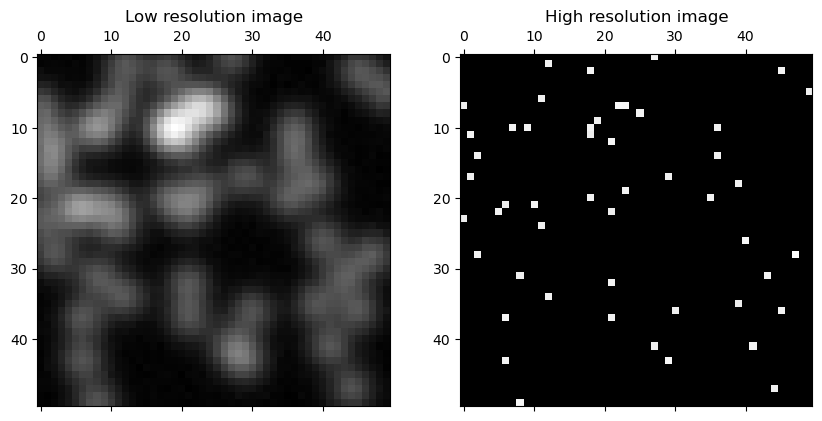

In [12]:
#Show an example of a generated data pair
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(PSF_data_low_res[25,0], cmap="gray", fignum=False)
plt.title("Low resolution image")

plt.subplot(122)
plt.matshow(PSF_data_high_res[25,0], cmap="gray", fignum=False)
plt.title("High resolution image")

plt.show()

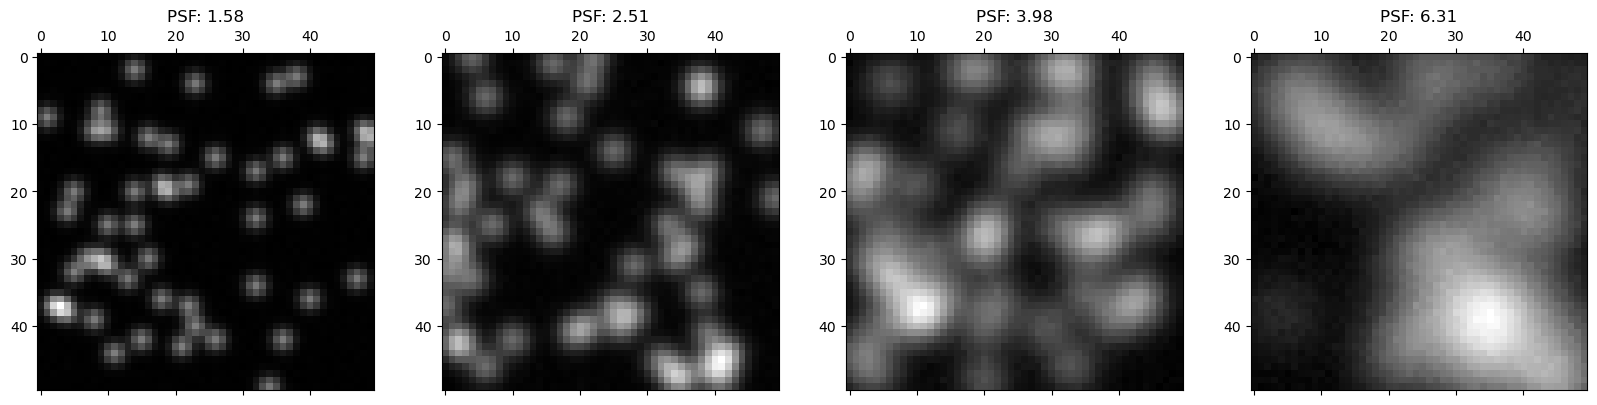

In [13]:
#Show examples for various PSF values
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.matshow(PSF_data_low_res[10,0], cmap="gray", fignum=False)
plt.title("PSF: " + str(np.round(PSF_width_axis_array[10],2)))
plt.subplot(142)
plt.matshow(PSF_data_low_res[20,0], cmap="gray", fignum=False)
plt.title("PSF: " + str(np.round(PSF_width_axis_array[20],2)))
plt.subplot(143)
plt.matshow(PSF_data_low_res[30,0], cmap="gray", fignum=False)
plt.title("PSF: " + str(np.round(PSF_width_axis_array[30],2)))
plt.subplot(144)
plt.matshow(PSF_data_low_res[40,0], cmap="gray", fignum=False)
plt.title("PSF: " + str(np.round(PSF_width_axis_array[40],2)))

plt.show()

## Generate dataset for the Emitter Concentration graph - panel (C)

In [14]:
#Horizontal axis
Conc_axis_array = np.logspace(np.log10(50), np.log10(750), 51).astype("int")

In [15]:
#Generating the Concentration dataset
Conc_data_low_res = np.zeros((Conc_axis_array.shape[0], number_of_samples, image_size, image_size))
Conc_data_high_res = np.zeros((Conc_axis_array.shape[0], number_of_samples, image_size, image_size))

for i in range(Conc_axis_array.shape[0]):
    Conc_data_low_res[i], Conc_data_high_res[i] = Generate_normed_dataset(number_of_samples, image_size, emitter_power, Poisson_noise, PSF_width, Conc_axis_array[i])

In [16]:
#Save the dataset
np.save("Data_files/Generated_data/Concentration_data_low_res.npy", Conc_data_low_res)
np.save("Data_files/Generated_data/Concentration_data_high_res.npy", Conc_data_high_res)
np.save("Data_files/Generated_data/Concentration_axis_array.npy", Conc_axis_array)

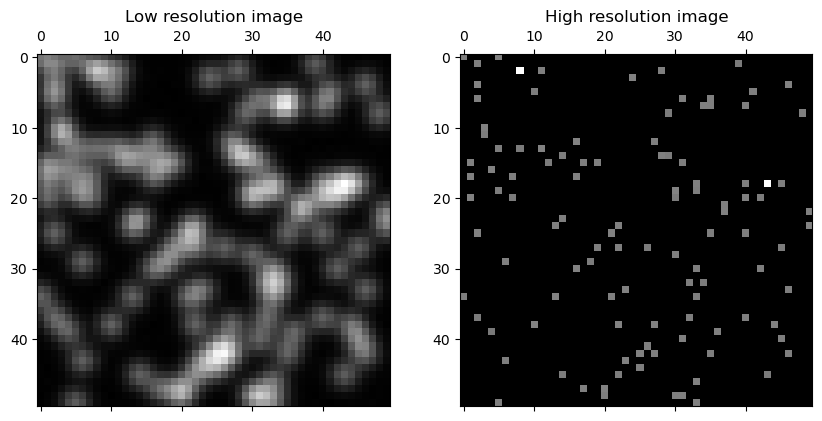

In [17]:
#Show an example of a generated data pair
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(Conc_data_low_res[15,0], cmap="gray", fignum=False)
plt.title("Low resolution image")

plt.subplot(122)
plt.matshow(Conc_data_high_res[15,0], cmap="gray", fignum=False)
plt.title("High resolution image")

plt.show()

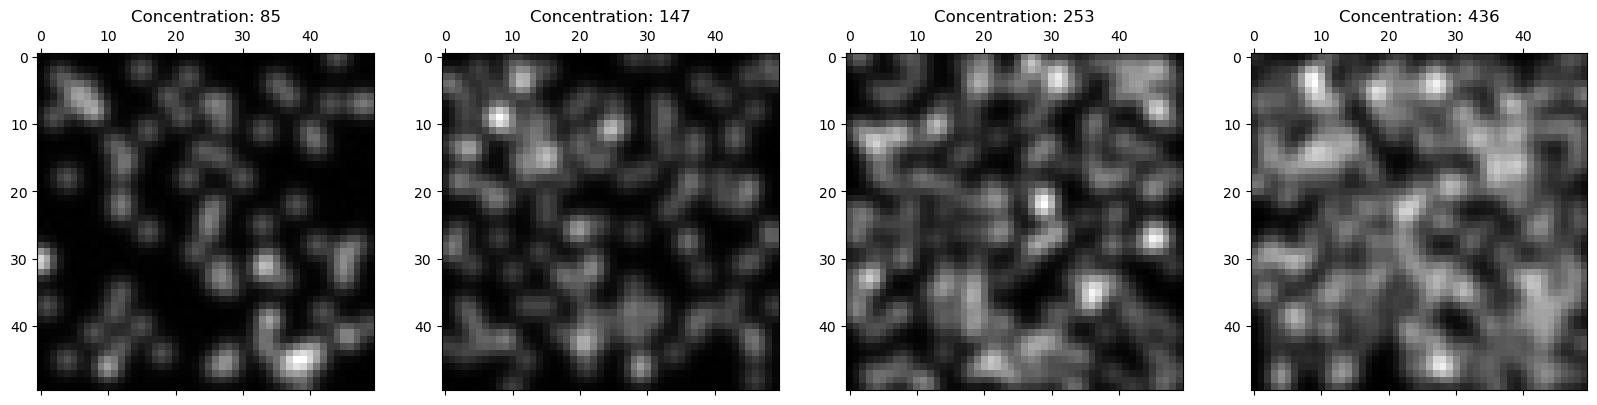

In [18]:
#Show examples for various Concentration values
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.matshow(Conc_data_low_res[10,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(Conc_axis_array[10]))
plt.subplot(142)
plt.matshow(Conc_data_low_res[20,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(Conc_axis_array[20]))
plt.subplot(143)
plt.matshow(Conc_data_low_res[30,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(Conc_axis_array[30]))
plt.subplot(144)
plt.matshow(Conc_data_low_res[40,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(Conc_axis_array[40]))

plt.show()

## Generate dataset for the Airy-to-Gauss kernel transition graph - panel (D)

In [19]:
#Horizontal axis
Transition_axis_array = np.linspace(0.01, 0.99, 51)

In [20]:
#Generating the Concentration dataset
Transition_data_low_res = np.zeros((Transition_axis_array.shape[0], number_of_samples, image_size, image_size))
Transition_data_high_res = np.zeros((Transition_axis_array.shape[0], number_of_samples, image_size, image_size))

for i in range(Transition_axis_array.shape[0]):
    Transition_data_low_res[i], Transition_data_high_res[i] = Generate_normed_dataset_for_transition(Transition_axis_array[i], number_of_samples, image_size, emitter_power, Poisson_noise, PSF_width, concentration)

In [21]:
#Save the dataset
np.save("Data_files/Generated_data/Transition_data_low_res.npy", Transition_data_low_res)
np.save("Data_files/Generated_data/Transition_data_high_res.npy", Transition_data_high_res)
np.save("Data_files/Generated_data/Transition_axis_array.npy", Transition_axis_array)

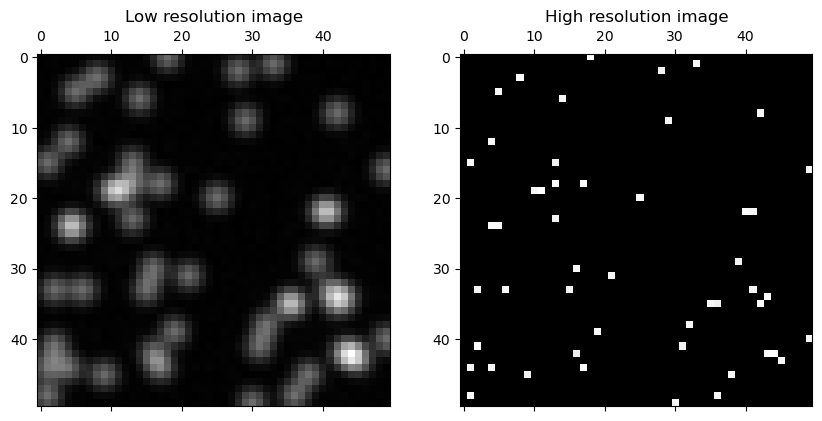

In [22]:
#Show an example of a generated data pair
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(Transition_data_low_res[15,0], cmap="gray", fignum=False)
plt.title("Low resolution image")

plt.subplot(122)
plt.matshow(Transition_data_high_res[15,0], cmap="gray", fignum=False)
plt.title("High resolution image")

plt.show()

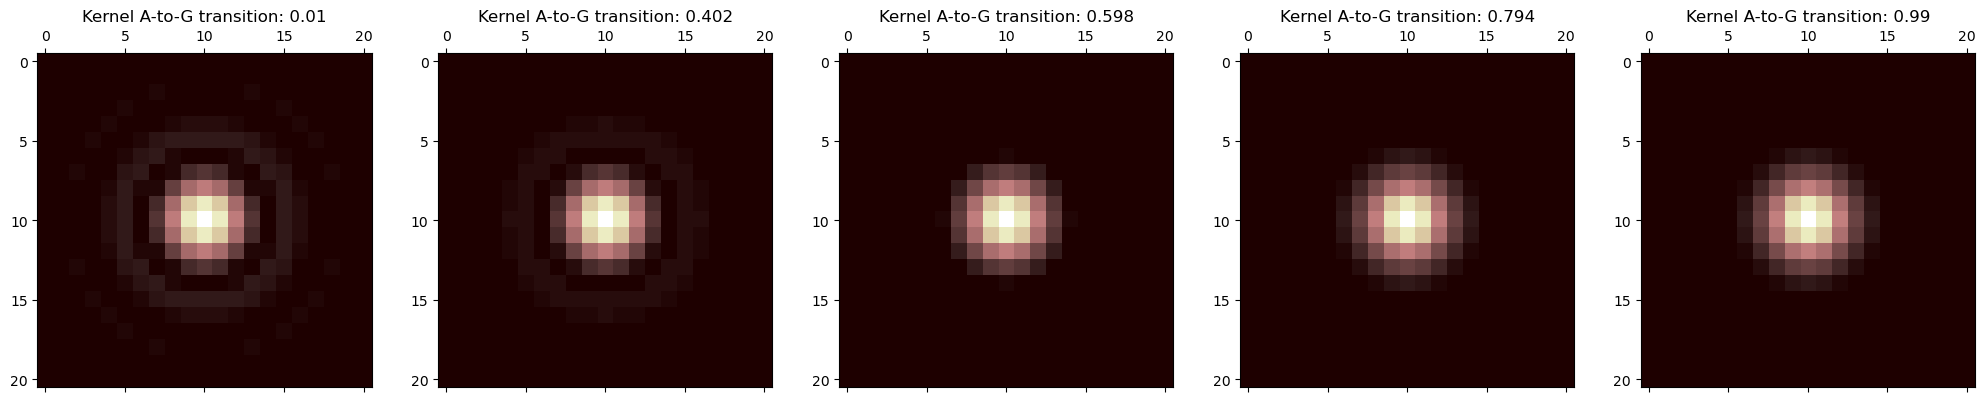

In [23]:
#Show examples for various Airy to Gauss kernel transitions
plt.figure(figsize=(25,5))
plt.subplot(151)
plt.matshow(Get_PSF_kernel(PSF_width, Transition_axis_array[0]), cmap="pink", fignum=False)
plt.title("Kernel A-to-G transition: " + str(Transition_axis_array[0]))
plt.subplot(152)
plt.matshow(Get_PSF_kernel(PSF_width, Transition_axis_array[10]), cmap="pink", fignum=False)
plt.title("Kernel A-to-G transition: " + str(Transition_axis_array[20]))
plt.subplot(153)
plt.matshow(Get_PSF_kernel(PSF_width, Transition_axis_array[20]), cmap="pink", fignum=False)
plt.title("Kernel A-to-G transition: " + str(Transition_axis_array[30]))
plt.subplot(154)
plt.matshow(Get_PSF_kernel(PSF_width, Transition_axis_array[30]), cmap="pink", fignum=False)
plt.title("Kernel A-to-G transition: " + str(Transition_axis_array[40]))
plt.subplot(155)
plt.matshow(Get_PSF_kernel(PSF_width, Transition_axis_array[40]), cmap="pink", fignum=False)
plt.title("Kernel A-to-G transition: " + str(Transition_axis_array[50]))

plt.show()